# EDA for Health Data (Pipeline Step 2)

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
import pandas as pd
url = 'https://raw.githubusercontent.com/davidrkearney/colab-notebooks/main/datasets/strokes_training.csv'
df = pd.read_csv(url, error_bad_lines=False)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [51]:
#df = df.drop(columns = ['id'])

In [52]:
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

profile = ProfileReport(df, title='Pandas Profiling Report')

In [53]:
profile.to_widgets()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
9,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
43390,10096,Female,69.0,0,0,Yes,Self-employed,Urban,229.85,31.2,never smoked,0
43391,30077,Male,6.0,0,0,No,children,Urban,77.48,19.1,NaN,0
43392,45266,Female,18.0,0,0,No,Private,Urban,131.96,22.8,NaN,0
43393,69344,Male,39.0,0,0,Yes,Private,Rural,132.22,31.6,never smoked,0
43394,52380,Male,47.0,0,0,No,Govt_job,Urban,68.52,25.2,formerly smoked,0
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0
43399,36271,Female,82.0,0,0,Yes,Private,Urban,79.48,20.6,never smoked,0


In [54]:
profile.to_notebook_iframe()

In [55]:
profile.to_file(output_file="pandas_profiling.html")

## Find and plot missingness in the data

In [56]:
pct_list = []
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    if round(pct_missing*100) >0:
        pct_list.append([col, round(pct_missing*100)])
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
gender - 0%
age - 0%
hypertension - 0%
heart_disease - 0%
ever_married - 0%
work_type - 0%
Residence_type - 0%
avg_glucose_level - 0%
bmi - 3%
smoking_status - 31%
stroke - 0%


<AxesSubplot:>

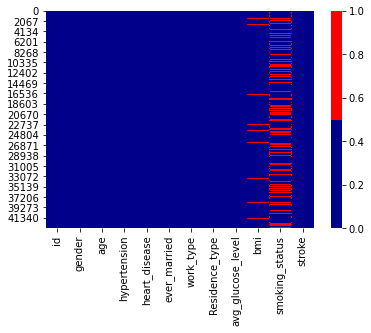

In [57]:
cols = df.columns 
colours = ['darkblue', 'red'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [58]:
df.groupby(["age", 'heart_disease'])['stroke'].agg(['sum']).round(0)

sum
age   heart_disease     
0.08  0                0
0.16  0                0
0.24  0                0
0.32  0                0
0.40  0                0
...                  ...
80.00 1               13
81.00 0               32
      1               11
82.00 0               24
      1               12

[163 rows x 1 columns]

In [59]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [60]:
# Discretize with respective equal-width bin
df['age_binned'] = pd.cut(df['age'], np.arange(0, 91, 5))
df['avg_glucose_level_binned'] = pd.cut(df['avg_glucose_level'], np.arange(0, 301, 10))
df['bmi_binned'] = pd.cut(df['bmi'], np.arange(0, 101, 5))

In [61]:
import seaborn as sns

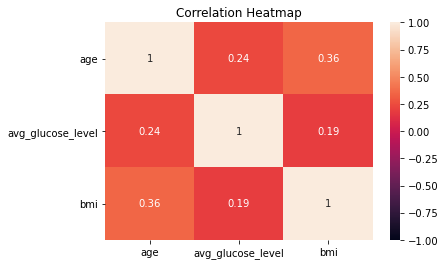

In [62]:
# Create the correlation heatmap
heatmap = sns.heatmap(df[['age', 'avg_glucose_level', 'bmi']].corr(), vmin=-1, vmax=1, annot=True)
# Create the title
heatmap.set_title('Correlation Heatmap');

In [63]:
def get_stacked_bar_chart(column):
    # Get the count of records by column and stroke    
    df_pct = df.groupby([column, 'stroke'])['age'].count()
    # Create proper DataFrame's format
    df_pct = df_pct.unstack()    
    return df_pct.plot.bar(stacked=True, figsize=(6,6), width=1);

In [64]:
def get_100_percent_stacked_bar_chart(column, width = 0.5):
    # Get the count of records by column and stroke
    df_breakdown = df.groupby([column, 'stroke'])['age'].count()
    # Get the count of records by gender
    df_total = df.groupby([column])['age'].count()
    # Get the percentage for 100% stacked bar chart
    df_pct = df_breakdown / df_total * 100
    # Create proper DataFrame's format
    df_pct = df_pct.unstack()
    return df_pct.plot.bar(stacked=True, figsize=(6,6), width=width);

<AxesSubplot:xlabel='age_binned'>

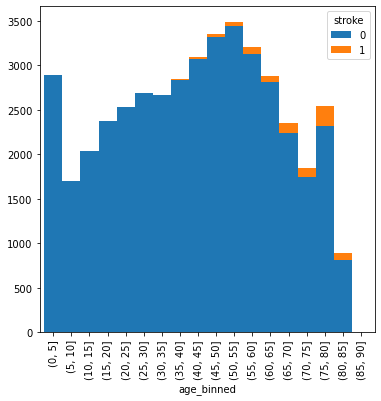

In [65]:
# Age related to risk
get_stacked_bar_chart('age_binned')

<AxesSubplot:xlabel='age_binned'>

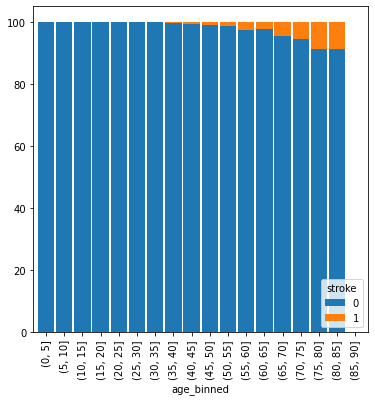

In [66]:
get_100_percent_stacked_bar_chart('age_binned', width = 0.9)

<AxesSubplot:xlabel='bmi_binned'>

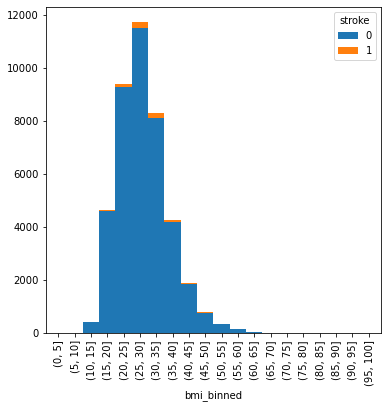

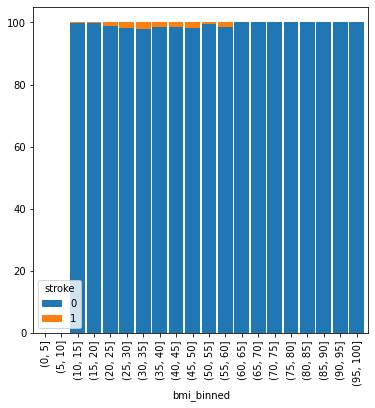

In [67]:
get_stacked_bar_chart('bmi_binned')
get_100_percent_stacked_bar_chart('bmi_binned', width = 0.9)

<AxesSubplot:xlabel='avg_glucose_level_binned'>

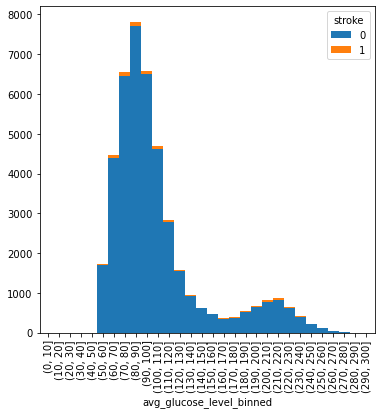

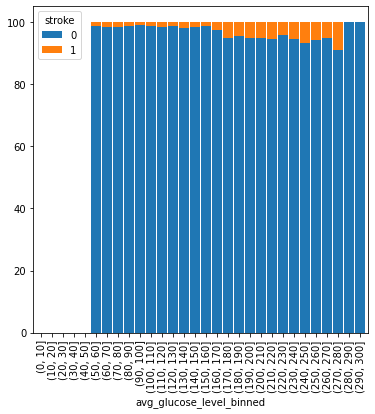

In [68]:
get_stacked_bar_chart('avg_glucose_level_binned')
get_100_percent_stacked_bar_chart('avg_glucose_level_binned', width = 0.9)

<AxesSubplot:xlabel='heart_disease'>

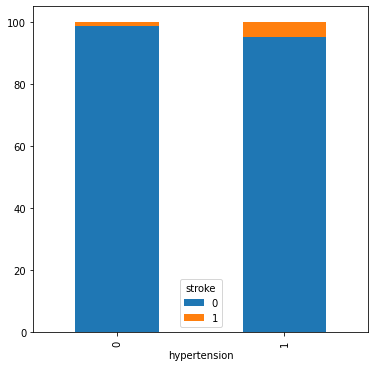

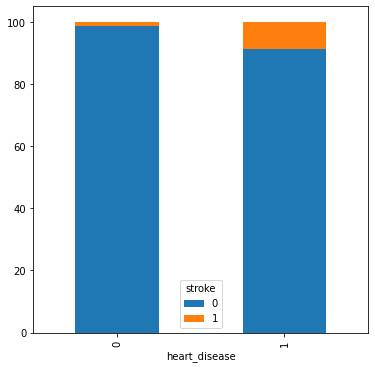

In [69]:
get_100_percent_stacked_bar_chart('hypertension')
get_100_percent_stacked_bar_chart('heart_disease')

<AxesSubplot:xlabel='Residence_type'>

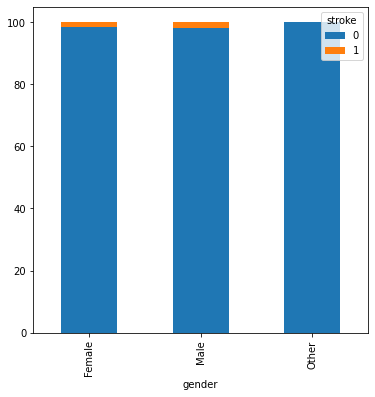

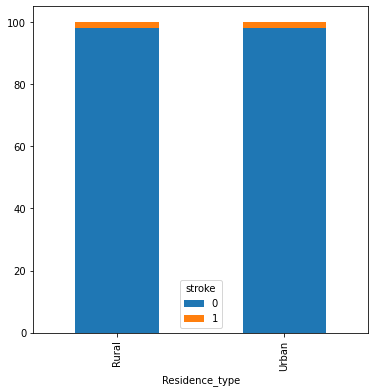

In [70]:
get_100_percent_stacked_bar_chart('gender')
get_100_percent_stacked_bar_chart('Residence_type')

age           
               count       mean
work_type                      
Govt_job        5440  49.097610
Never_worked     177  17.757062
Private        24834  45.015060
Self-employed   6793  59.307817
children        6156   6.699253

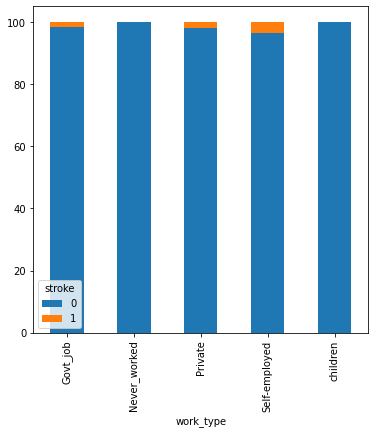

In [71]:
get_100_percent_stacked_bar_chart('work_type')
df.groupby(['work_type'])[['age']].agg(['count', 'mean'])

age           
              count       mean
ever_married                  
No            15462  21.238236
Yes           27938  53.828871

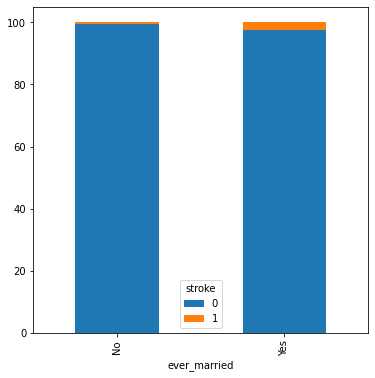

In [72]:
get_100_percent_stacked_bar_chart('ever_married')
df.groupby(['ever_married'])[['age']].agg(['count', 'mean'])

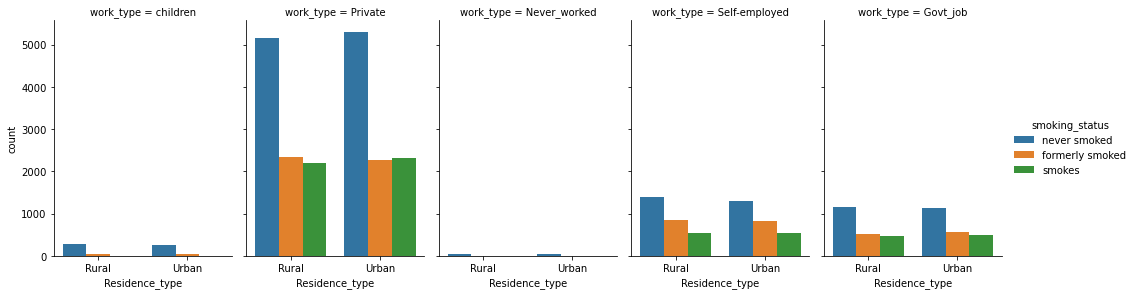

In [73]:
g = sns.catplot(x="Residence_type", hue="smoking_status", col="work_type",
                data=df, kind="count",
                height=4, aspect=.7)

<AxesSubplot:>

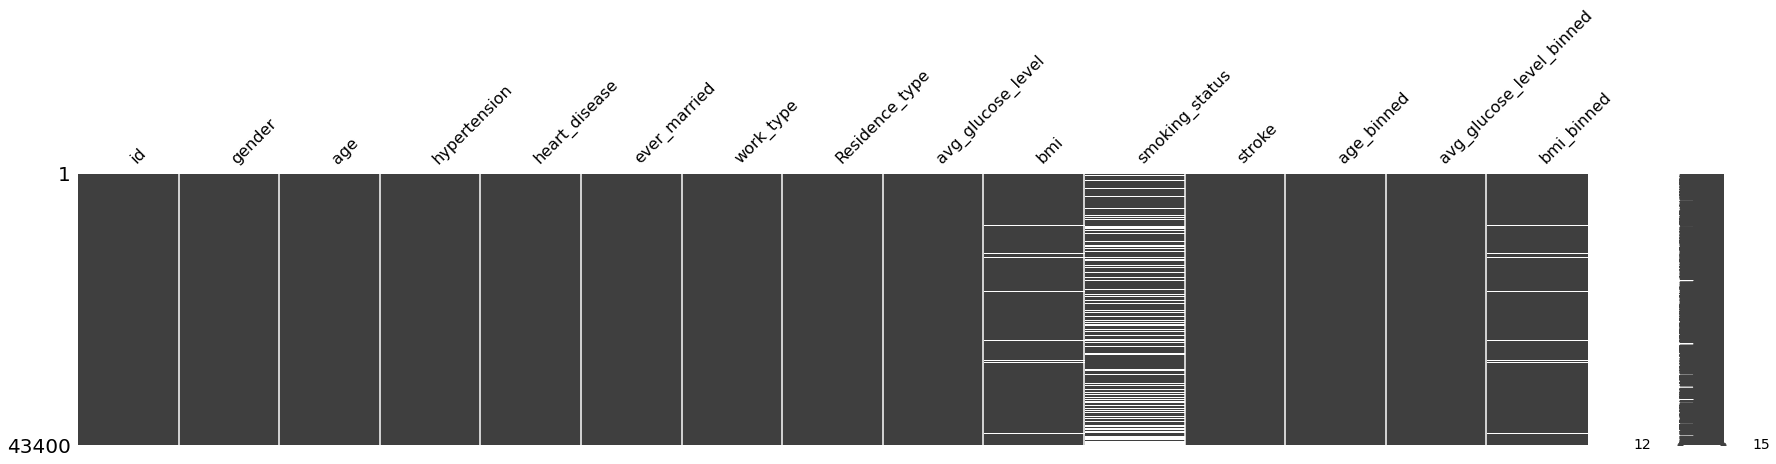

In [74]:
import missingno
missingno.matrix(df, figsize = (30,5))

<AxesSubplot:xlabel='hypertension', ylabel='count'>

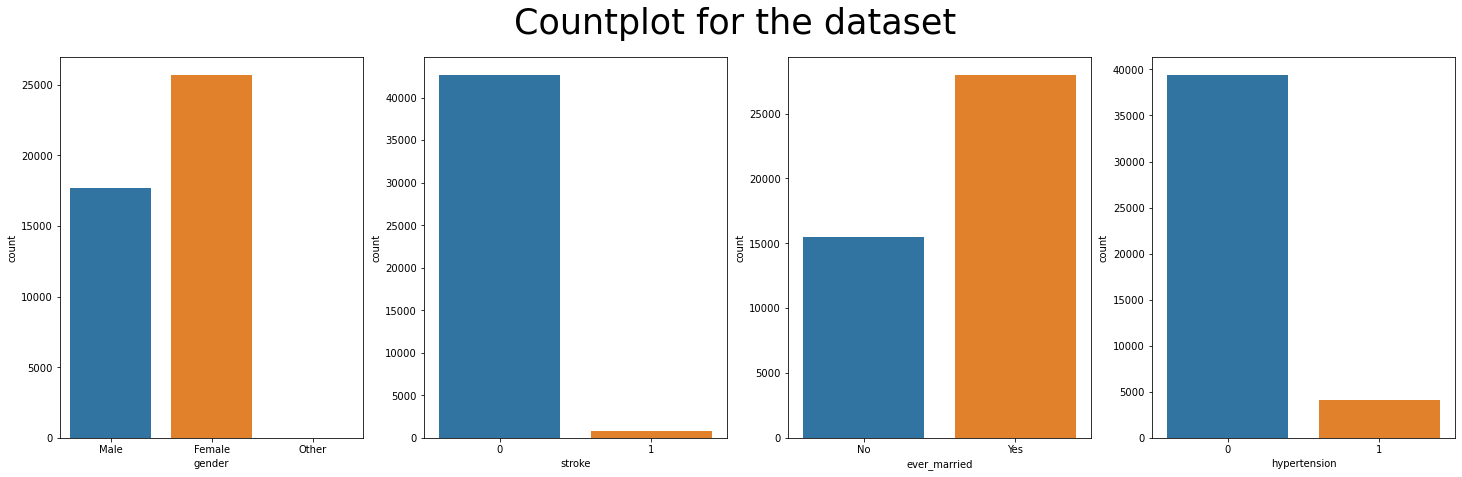

In [75]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(25,7))

fig.suptitle("Countplot for the dataset", fontsize=35)

sns.countplot(x="gender", data=df,ax=ax1)
sns.countplot(x="stroke", data=df,ax=ax2)
sns.countplot(x="ever_married", data=df,ax=ax3)
sns.countplot(x="hypertension", data=df,ax=ax4)

/home/david/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/david/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/david/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


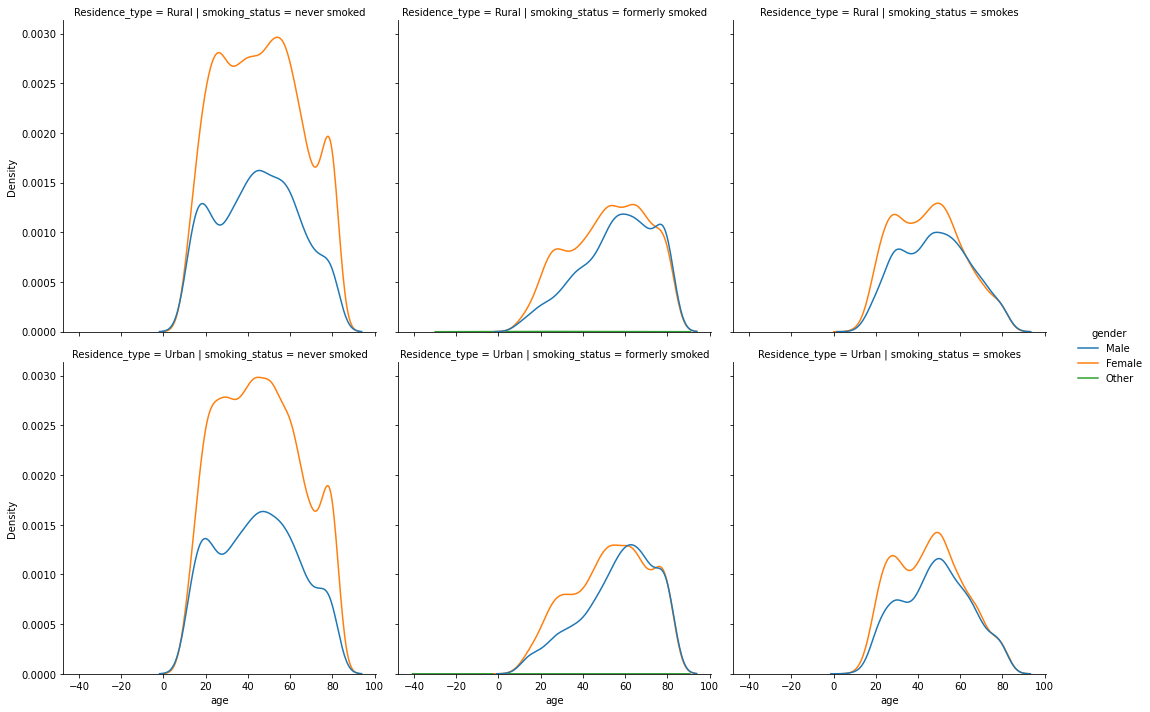

In [76]:
sns.displot(x="age", data=df, kind="kde", hue="gender", col="smoking_status", row="Residence_type")

<AxesSubplot:xlabel='stroke', ylabel='age'>

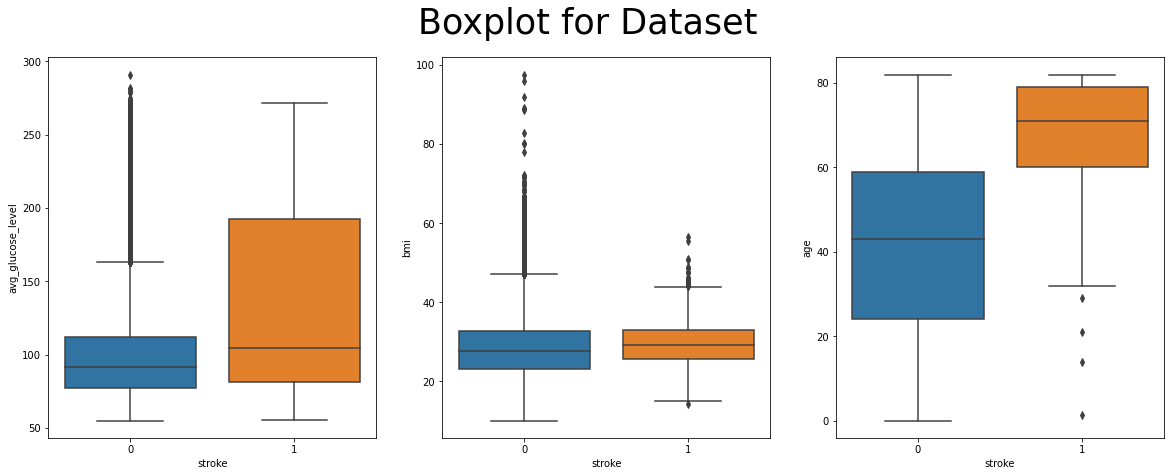

In [77]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,7))
fig.suptitle("Boxplot for Dataset", fontsize=35)

sns.boxplot(x="stroke", y="avg_glucose_level", data=df,ax=ax1)
sns.boxplot(x="stroke", y="bmi", data=df,ax=ax2)
sns.boxplot(x="stroke", y="age", data=df,ax=ax3)

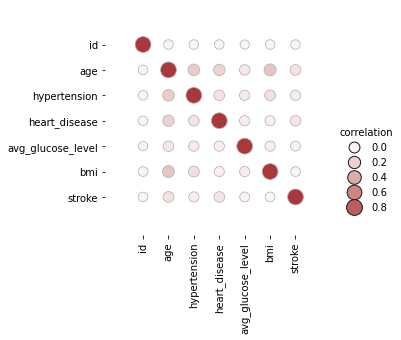

In [78]:
# Compute a correlation matrix and convert to long-form
corr_mat = df.corr("kendall").stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=5, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(0.25)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".1")

In [79]:
strokes_temp_df=df
strokes_temp_df[['stroke','hypertension']] = df[['stroke','hypertension']].astype('int')
corr = strokes_temp_df.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.00,0.01,0.01,0.01,0.02,0.02,0.00
age,0.01,1.00,0.27,0.25,0.24,0.36,0.16
hypertension,0.01,0.27,1.00,0.12,0.16,0.16,0.08
heart_disease,0.01,0.25,0.12,1.00,0.15,0.06,0.11
avg_glucose_level,0.02,0.24,0.16,0.15,1.00,0.19,0.08
bmi,0.02,0.36,0.16,0.06,0.19,1.00,0.02
stroke,0.00,0.16,0.08,0.11,0.08,0.02,1.00
